# Using Networkx to solve the TSP

For this artifact, I'll be using Python's networkx package in order to solve the Travelling Salesperson Problem, with data from the TSPLib. Networkx is a Python package that is used to construct complex graphs and solve problems related to those graphs. There are multiple algorithms within networkx which attempt to solve NP-hard problems, and give the best approximation. 

We will be looking at the `traveling_salesman_problem` function and I wanted to see how this function works as well as how to operate networkx and solve it. First, let's install our packages.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Next, we'll read in the data using `pandas`. This data was found on the TSPlib website, from the symmetric TSP section. As the data was saved in a `.gz` format, it was hard to read it from the web, so I downloaded and unzipped the file, and then read it locally. The data was also changed into a `.csv` format in excel. To read this locally, save it in the same folder as this notebook. 

In [2]:
data = pd.read_csv('TSPlib.csv', header = None)
data = pd.DataFrame(data)

In [3]:
# Taking a look at the data
data 

,0,1,2
0,1,1357,1905
1,2,2650,802
2,3,1774,107
3,4,1307,964
4,5,3806,746
...,...,...,...
195,196,3756,882
196,197,776,392
197,198,1724,1642
198,199,198,1810


Our next step will be to separate the data into the nodes and the vertices, and convert the vertices to an array. 

In [4]:
nodes = data.loc[:,[0]]
points = data.loc[:,[1,2]]

In [5]:
points = np.array(points)

Using the distance matrix function created in Artifact 3, we will find the distances between all the points, to assign as a weight.

In [6]:
def dist(A):
    n, m = A.shape
    # create a matrix with just zeros of dimension n x n
    Dist = np.zeros((n, n))
    # for each entry in the A matrix, calculate the distance with every other entry and create a matrix
    for i in range(0, n):
        for j in range(0, n):
            Dist[i, j] = ((A[i, 0] - A[j, 0])**2 + (A[i, 1] - A[j, 1])**2)**0.5
    return Dist

In [7]:
dist_points = dist(points)

Let us now create a cyclic graph and take a look at the order in which the edges are.

In [8]:
np.random.seed(300)
g = nx.cycle_graph(200)
g.edges

EdgeView([(0, 1), (0, 199), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (97, 98), (98, 99), (99, 100)

The next steps focus on assigning weights to each of the nodes. Since we know what order the edges are in, let's create a new vector of all the weights of the edges. The upper diagonal of the distance marix generated would contain the weights for edges (0,1) till (198, 199). Since the second edge is (0, 199), we'll add the weight for that edge and as a consequence, the second one separately.

In [9]:
weights = np.zeros((200))
weights[1] = dist_points[0, 199]
weights_add = np.diag(dist_points, 1)
weights[0] = weights_add[0]
for i in range(1,199):
    weights[i + 1] = weights_add[i]

Lastly, we will assign the weights to the edges in the graph, similarly to the previous step

In [10]:
for i in range(0, 199):
    g[i][i + 1]["weight"] = weights[i + 1]
g[0][1]["weight"] = weights[0]
g[0][199]["weight"] = weights[1]

Let us now solve the problem. 

In [11]:
path = nx.approximation.traveling_salesman_problem(g, cycle = False)
path

[86,
 85,
 84,
 83,
 82,
 81,
 80,
 79,
 78,
 77,
 76,
 75,
 74,
 73,
 72,
 71,
 70,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 0,
 199,
 198,
 197,
 196,
 195,
 194,
 193,
 192,
 191,
 190,
 189,
 188,
 187,
 186,
 185,
 184,
 183,
 182,
 181,
 180,
 179,
 178,
 177,
 176,
 175,
 174,
 173,
 172,
 171,
 170,
 169,
 168,
 167,
 166,
 165,
 164,
 163,
 162,
 161,
 160,
 159,
 158,
 157,
 156,
 155,
 154,
 153,
 152,
 151,
 150,
 149,
 148,
 147,
 146,
 145,
 144,
 143,
 142,
 141,
 140,
 139,
 138,
 137,
 136,
 135,
 134,
 133,
 132,
 131,
 130,
 129,
 128,
 127,
 126,
 125,
 124,
 123,
 122,
 121,
 120,
 119,
 118,
 117,
 116,
 115,
 114,
 113,
 112,
 111,
 110,
 109,
 108,
 107,
 106,
 105,
 104,

We will now plot out the original route of the graph.

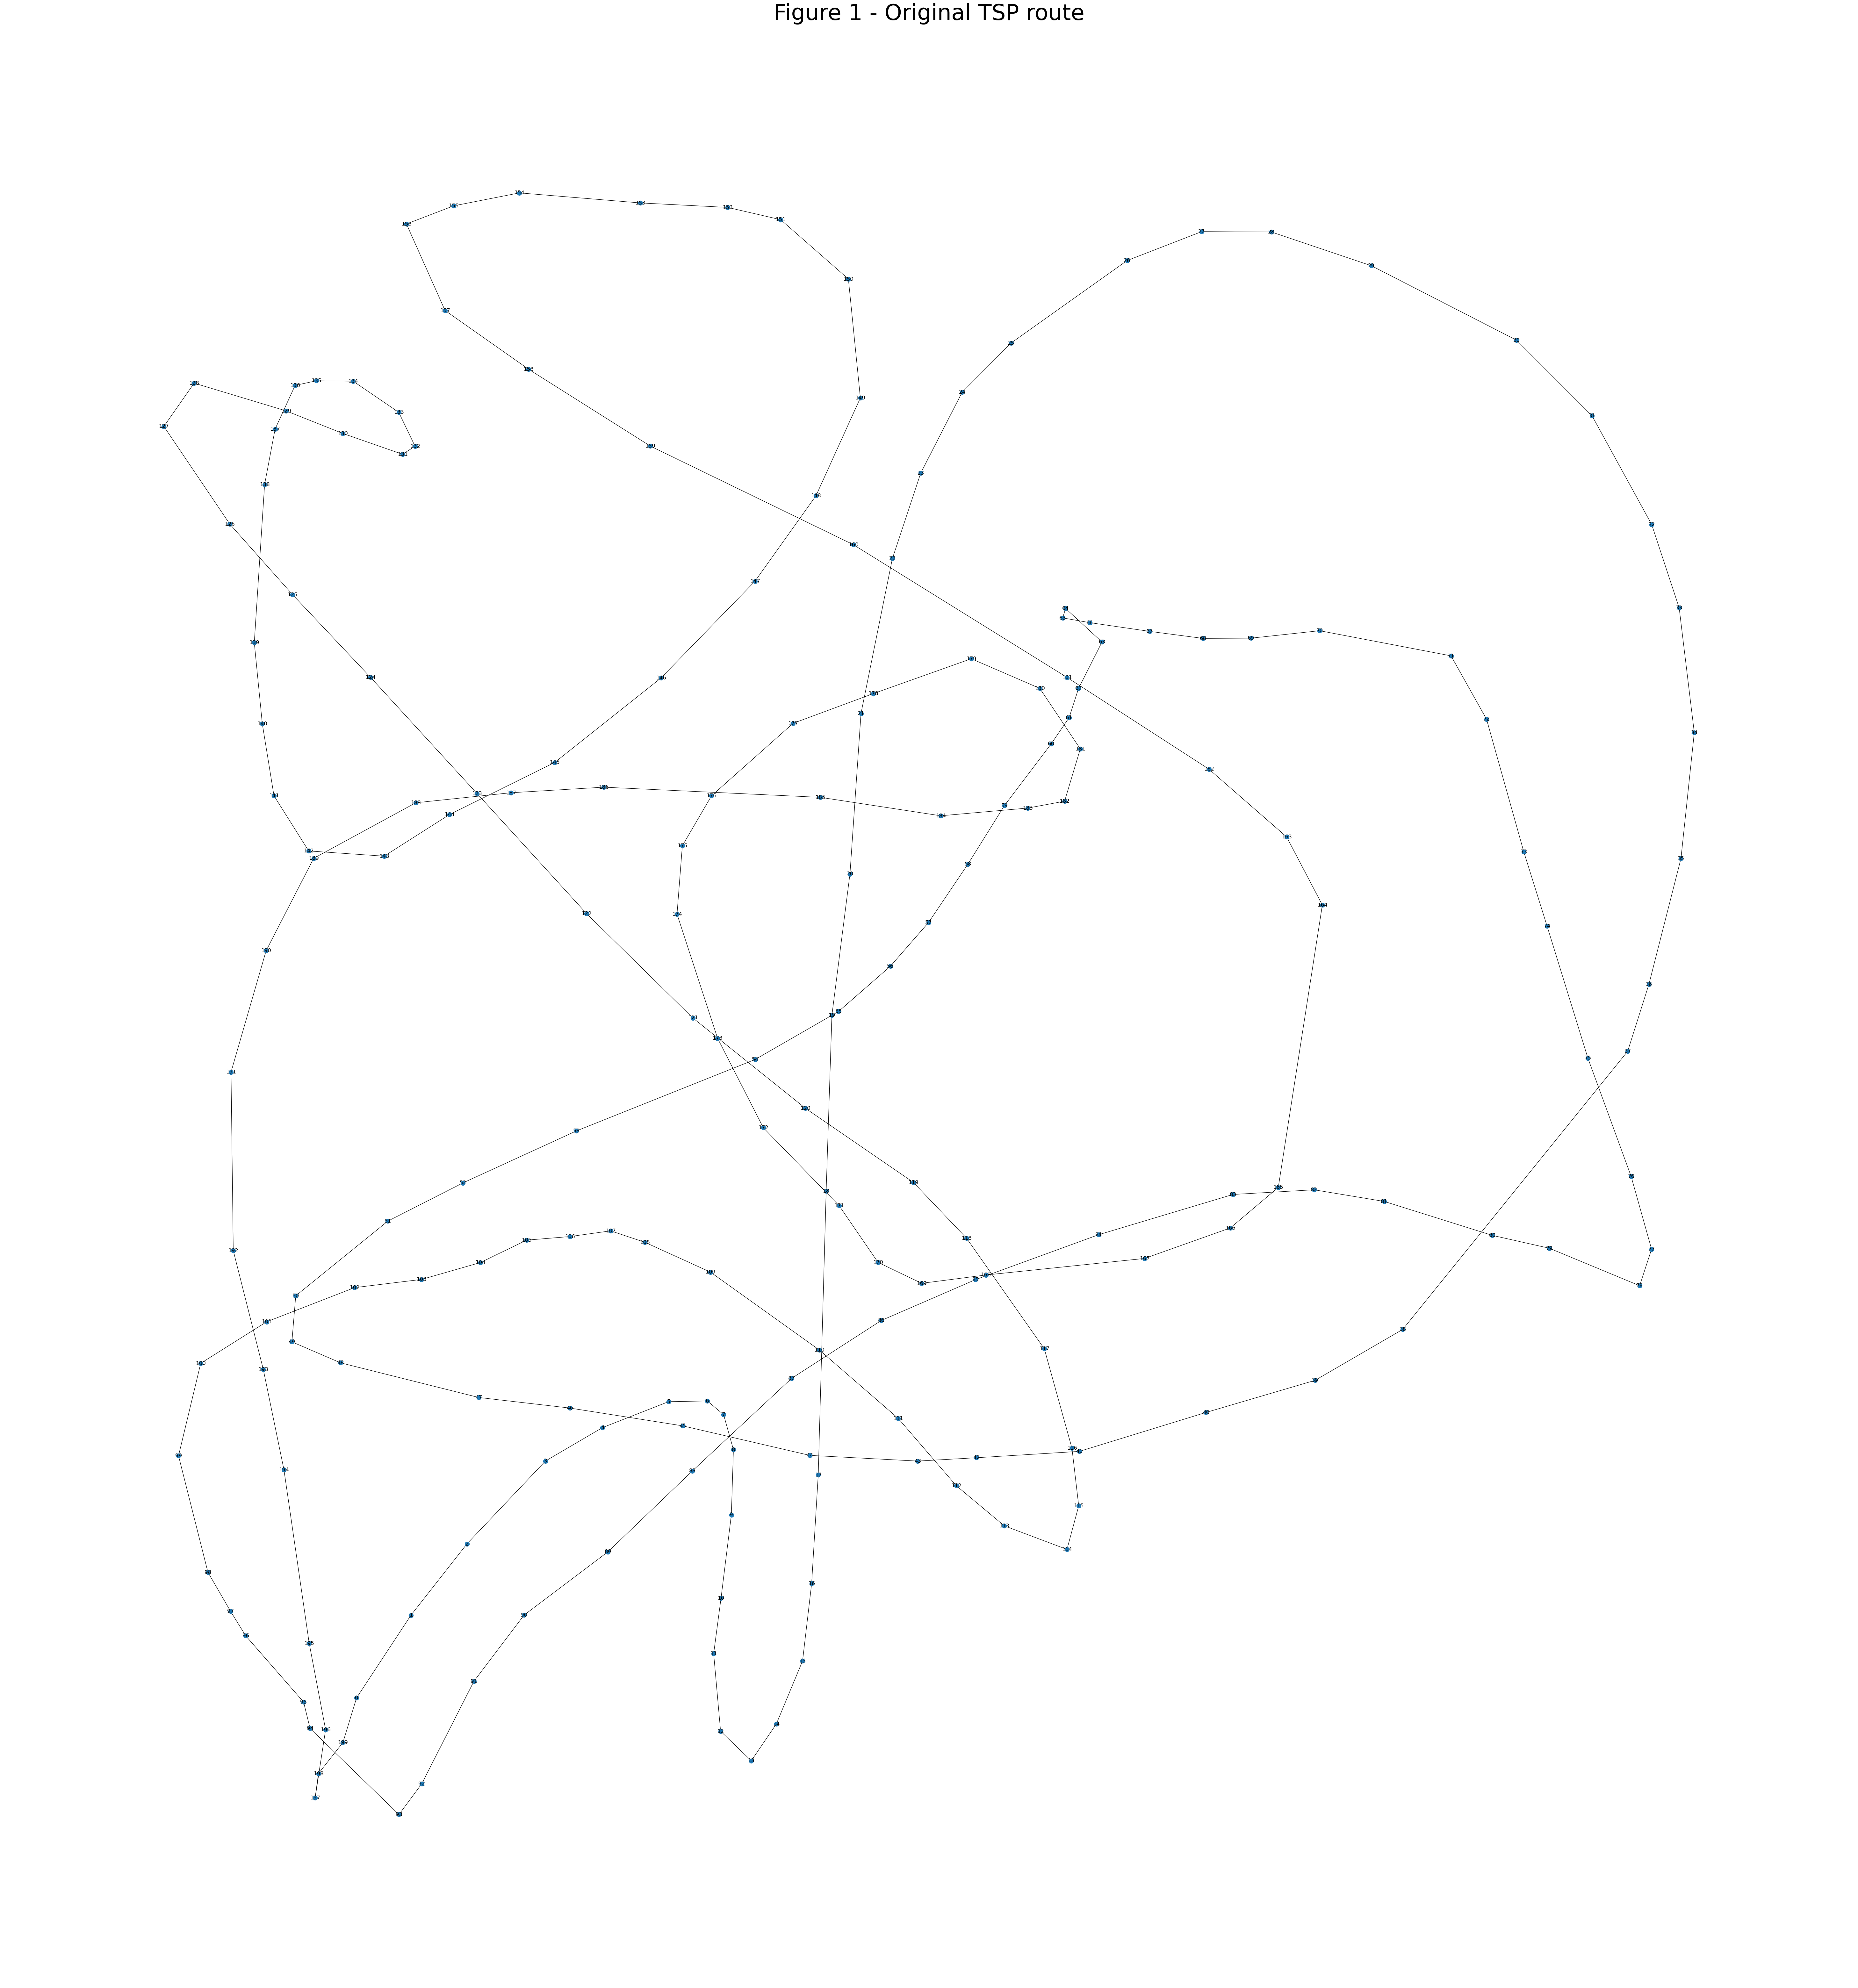

In [12]:
plt.figure(figsize=(75, 80))
plt.title("Figure 1 - Original TSP route", fontsize = 50)
nx.draw(g, node_size = 100, with_labels = True)

As there are so many different nodes, the graph is a little difficult to read, but at a closer look, we can see that some nodes are closer to each other than the edge they are in and using a cyclic path may not be the best.

## How does this function work?

While using the function is relatively easy, what do the arguments mean and how is the function designed? We create a cycle instead of creating an empty graph with just points as the number of possible edges and paths is extremely high, and so, we can't add edges to the graph. Without edges, the function is unable to solve the problem, so we default into creating a cycle. Next, within the function, an algorithm (the default is `christofides`) generates the minimal Hamiltonian cycle for the nodes. The Christofides function is said to be the best polynomial time function to solve the TSP and that it is within a factor of 3/2 of the optimal solution length. We set `cycle = False` in the function in order to remove the largest edge in the cycle to create a path, and then, each edge on the new complete graph is replaced by the shortest path between the nodes on the original graph. 

There are multiple different algorithms we can use instead of `christofides` in this function, such as:
- `greedy_tsp`
- `simulated_annealing_tsp`
- `threshold_accepting_tsp`

To use these algorithms, we would need to create a lambda function and declare this within the `traveling_salesman_problem` function.

## Discussion
While networkx is extremely effective in creating graphs, the TSP function does not always give an optimal result. We can't say for sure, but looking at Figure 1 above, we can assume that the optimal path for a TSP will not be an exact cycle. The solution also does not return back to its original starting point, which means it is not fully solved for the TSP. So it's hard to say how effective exactly the networkx function for solving the TSP is.